# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [ ]:
# Set style untuk visualisasi
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)

# Membaca dataset dari file CSV
df = pd.read_csv('bank_transactions_data_2.csv')

# Menampilkan 5 baris pertama dari dataset
print("5 Baris Pertama Dataset:")
print(df.head())

5 Baris Pertama Dataset:
  TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128              14.09  2023-04-11 16:29:14   
1      TX000002   AC00455             376.24  2023-06-27 16:44:19   
2      TX000003   AC00019             126.29  2023-07-10 18:16:08   
3      TX000004   AC00070             184.50  2023-05-05 16:32:11   
4      TX000005   AC00411              13.45  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0           70             Doc

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  Acco

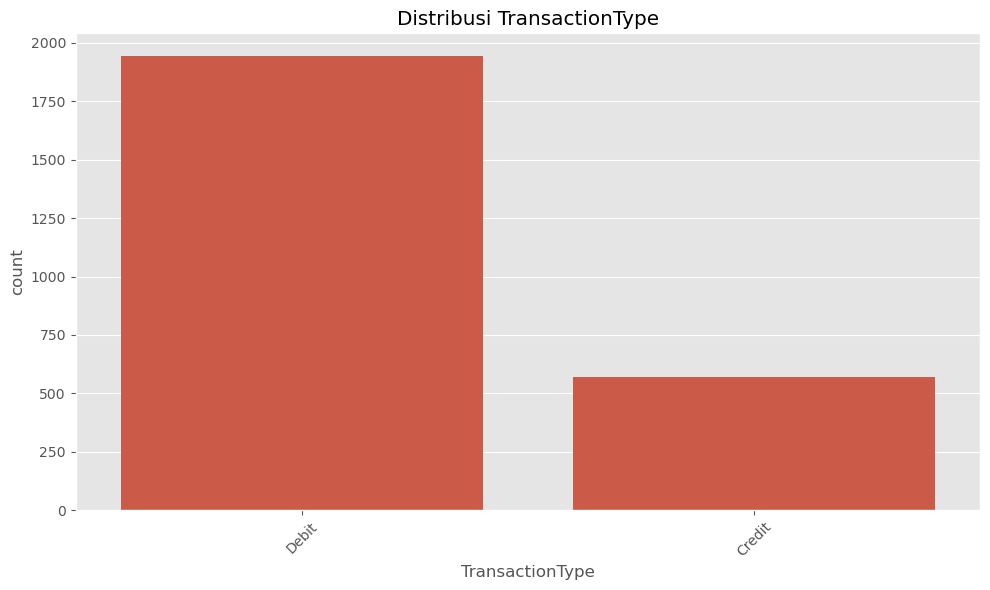


Distribusi Location:
Location
Fort Worth          70
Los Angeles         69
Oklahoma City       68
Charlotte           68
Tucson              67
Philadelphia        67
Omaha               65
Miami               64
Detroit             63
Houston             63
Memphis             63
Denver              62
Kansas City         61
Boston              61
Mesa                61
Atlanta             61
Seattle             61
Colorado Springs    60
Jacksonville        60
Fresno              60
Chicago             60
Austin              59
San Jose            59
Raleigh             59
San Antonio         59
San Diego           59
Indianapolis        58
New York            58
San Francisco       57
Nashville           55
Milwaukee           55
Las Vegas           55
Virginia Beach      55
Phoenix             55
Columbus            54
Sacramento          53
Baltimore           51
Louisville          51
Dallas              49
Washington          48
El Paso             46
Portland            42
Alb

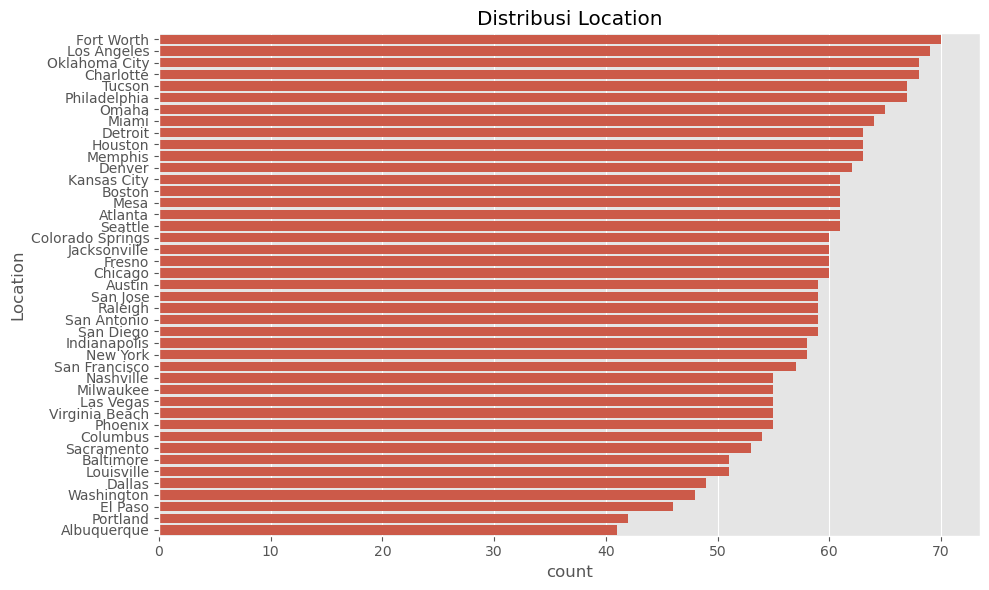


Distribusi Channel:
Channel
Branch    868
ATM       833
Online    811
Name: count, dtype: int64


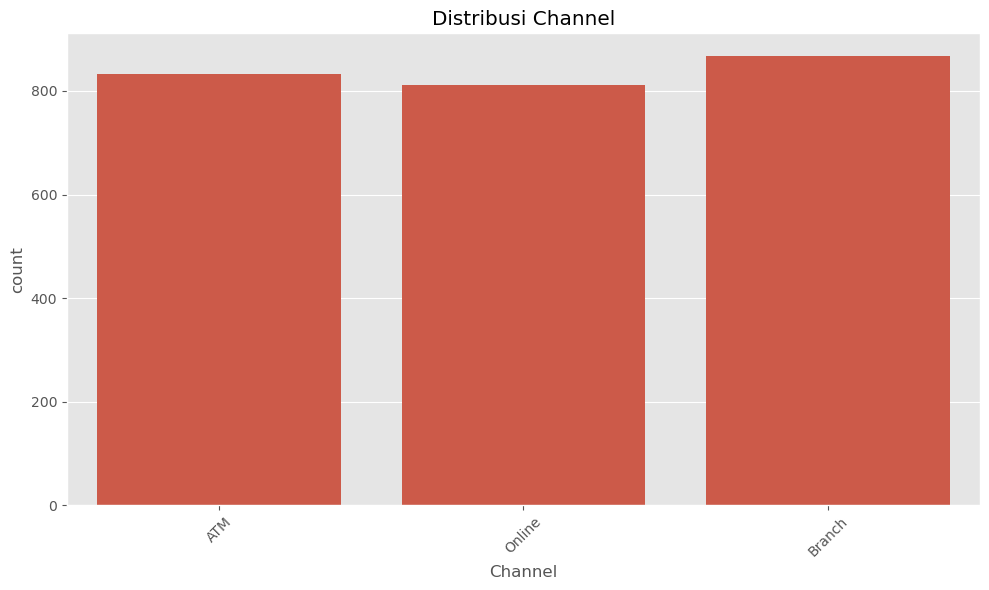


Distribusi CustomerOccupation:
CustomerOccupation
Student     657
Doctor      631
Engineer    625
Retired     599
Name: count, dtype: int64


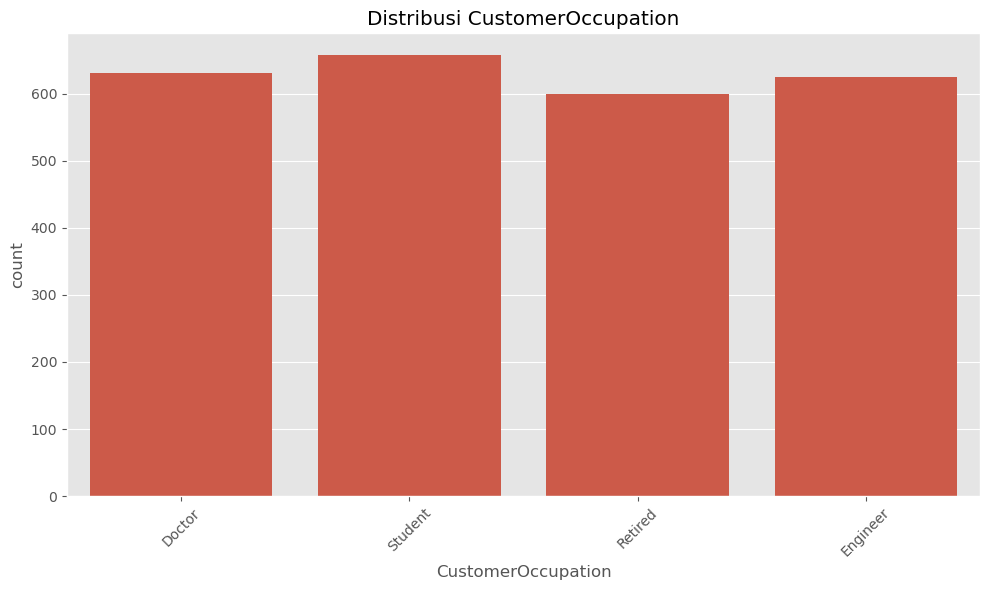


Statistik untuk TransactionAmount:
count    2512.000000
mean      297.593778
std       291.946243
min         0.260000
25%        81.885000
50%       211.140000
75%       414.527500
max      1919.110000
Name: TransactionAmount, dtype: float64


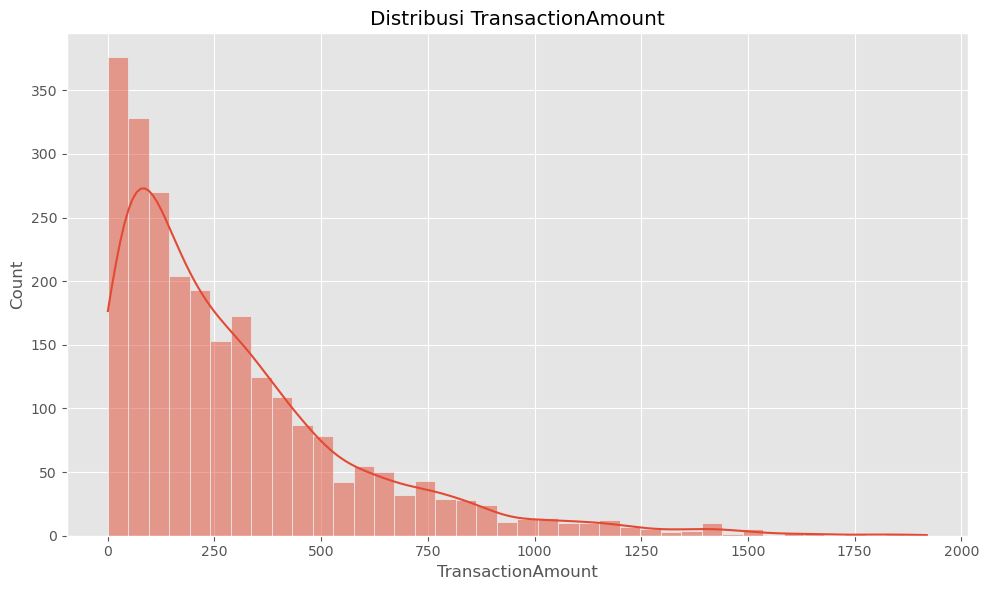


Statistik untuk CustomerAge:
count    2512.000000
mean       44.673965
std        17.792198
min        18.000000
25%        27.000000
50%        45.000000
75%        59.000000
max        80.000000
Name: CustomerAge, dtype: float64


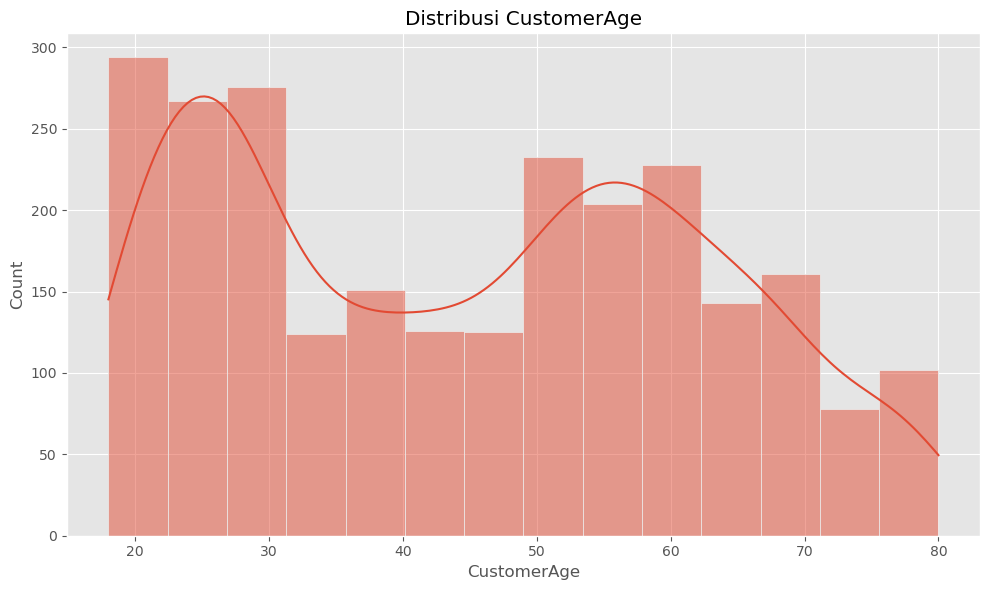


Statistik untuk TransactionDuration:
count    2512.000000
mean      119.643312
std        69.963757
min        10.000000
25%        63.000000
50%       112.500000
75%       161.000000
max       300.000000
Name: TransactionDuration, dtype: float64


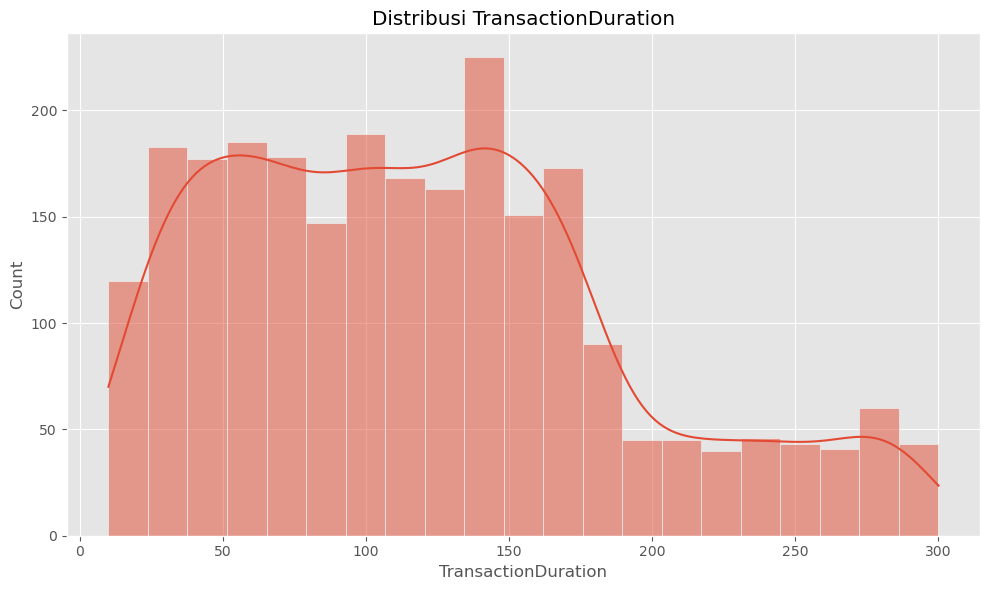


Statistik untuk LoginAttempts:
count    2512.000000
mean        1.124602
std         0.602662
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         5.000000
Name: LoginAttempts, dtype: float64


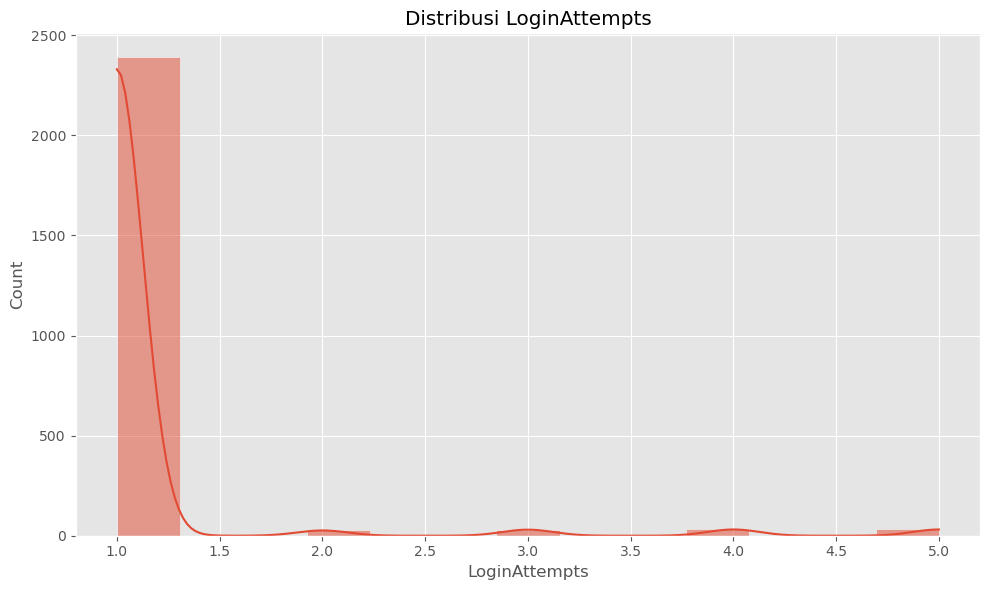


Statistik untuk AccountBalance:
count     2512.000000
mean      5114.302966
std       3900.942499
min        101.250000
25%       1504.370000
50%       4735.510000
75%       7678.820000
max      14977.990000
Name: AccountBalance, dtype: float64


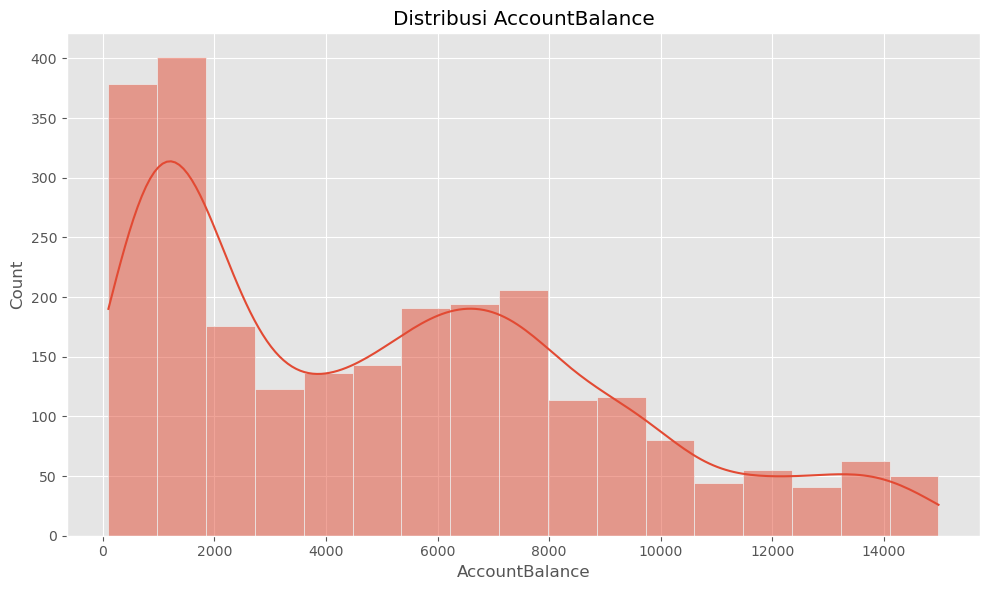

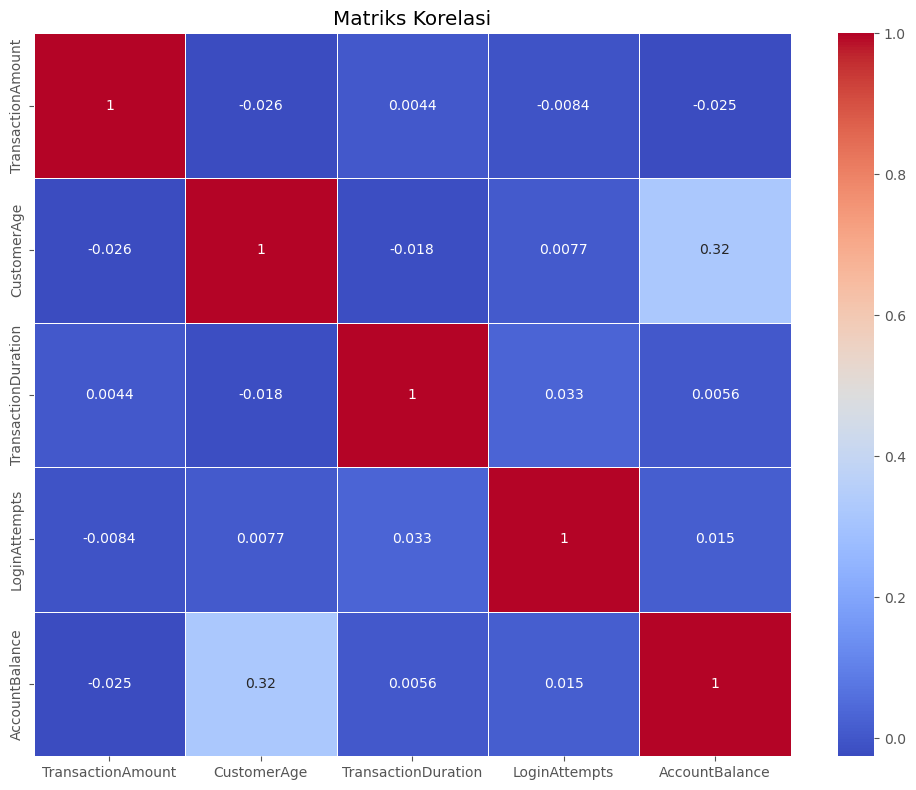

In [101]:
# Informasi struktur data
print("\nInformasi Dataset:")
print(df.info())

# Statistik deskriptif untuk kolom numerik
print("\nStatistik Deskriptif Kolom Numerik:")
print(df.describe())

# Memeriksa nilai yang hilang
print("\nJumlah Nilai yang Hilang untuk Setiap Kolom:")
print(df.isnull().sum())

# Distribusi data kategorikal
print("\nDistribusi Nilai untuk Kolom Kategorikal:")
categorical_columns = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']
for col in categorical_columns:
    print(f"\nDistribusi {col}:")
    print(df[col].value_counts())
    
    # Visualisasi untuk distribusi kategorikal
    plt.figure(figsize=(10, 6))
    if col == 'Location':  # Untuk Location, kita gunakan plot horizontal karena banyak nilai unik
        sns.countplot(y=col, data=df, order=df[col].value_counts().index)
        plt.title(f'Distribusi {col}')
        plt.tight_layout()
    else:
        sns.countplot(x=col, data=df)
        plt.title(f'Distribusi {col}')
        plt.xticks(rotation=45)
        plt.tight_layout()
    plt.show()

# Distribusi data numerik
numerical_columns = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 
                     'LoginAttempts', 'AccountBalance']
for col in numerical_columns:
    print(f"\nStatistik untuk {col}:")
    print(df[col].describe())
    
    # Visualisasi untuk distribusi numerik
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribusi {col}')
    plt.tight_layout()
    plt.show()

# Matriks korelasi untuk kolom numerik
plt.figure(figsize=(10, 8))
corr_matrix = df[numerical_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriks Korelasi')
plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [102]:
# Menyeleksi fitur yang akan digunakan untuk clustering
features = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 
           'LoginAttempts', 'AccountBalance', 'TransactionType', 
           'Channel', 'CustomerOccupation']

# Memisahkan fitur numerik dan kategorikal
numerical_features = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 
                      'LoginAttempts', 'AccountBalance']
categorical_features = ['TransactionType', 'Channel', 'CustomerOccupation']

# Membuat subset data dengan fitur yang diseleksi
X = df[features].copy()

# Preprocessor untuk standardisasi dan encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
    ])

# Fit dan Transform data
X_processed = preprocessor.fit_transform(X)

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

k=2, inertia=12716.71, silhouette score=0.2027
k=3, inertia=10563.33, silhouette score=0.2205
k=4, inertia=9243.31, silhouette score=0.2115
k=5, inertia=8171.46, silhouette score=0.2171
k=6, inertia=7409.22, silhouette score=0.2136
k=7, inertia=6919.49, silhouette score=0.2033
k=8, inertia=6515.59, silhouette score=0.1882
k=9, inertia=6226.85, silhouette score=0.1783
k=10, inertia=5980.74, silhouette score=0.1780


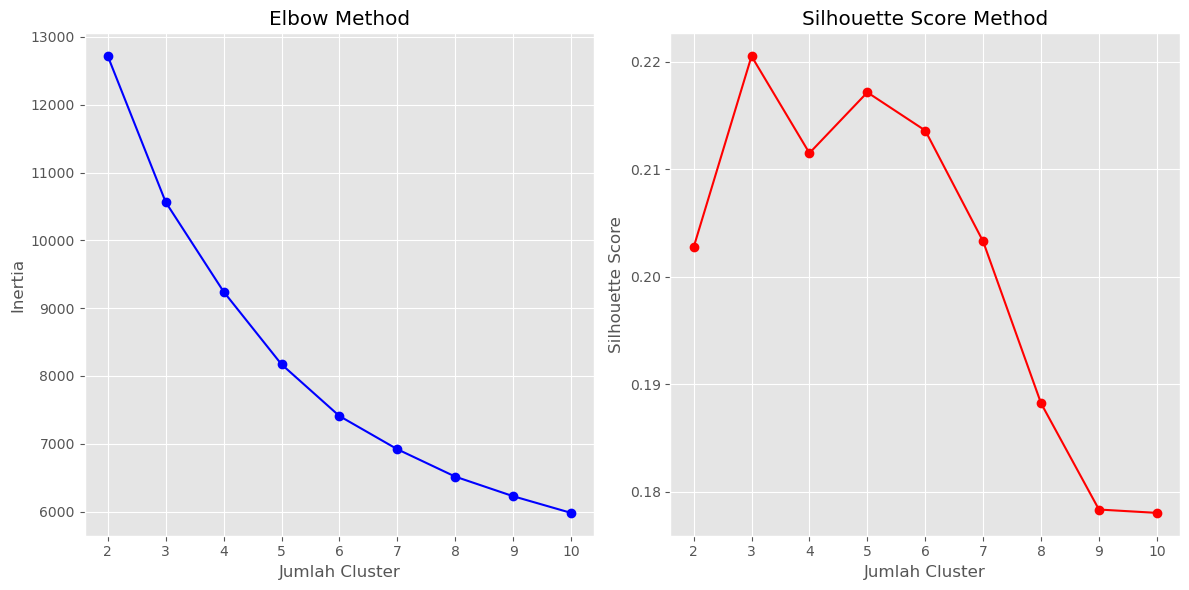

In [103]:
# Menggunakan Elbow method untuk menentukan jumlah cluster yang optimal
inertia = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    # Inisialisasi dan fit KMeans
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_processed)
    
    # Menghitung inertia (untuk Elbow method)
    inertia.append(kmeans.inertia_)
    
    # Menghitung Silhouette Score
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X_processed, labels))
    
    print(f"k={k}, inertia={kmeans.inertia_:.2f}, silhouette score={silhouette_score(X_processed, labels):.4f}")

# Visualisasi Elbow method
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, 'bo-')
plt.title('Elbow Method')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.grid(True)

# Visualisasi Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 'ro-')
plt.title('Silhouette Score Method')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.tight_layout()
plt.show()

# Berdasarkan hasil analisis, silhouette score tertinggi pada k=5
optimal_clusters = 5

# Membangun model KMeans dengan jumlah cluster optimal
kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
clusters = kmeans_optimal.fit_predict(X_processed)

# Menambahkan label cluster ke DataFrame
df['Cluster'] = clusters

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [104]:
sil_score = silhouette_score(X_processed, clusters)
print(f"\nSilhouette Score untuk model dengan {optimal_clusters} cluster: {sil_score:.4f}")


Silhouette Score untuk model dengan 5 cluster: 0.2171


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [105]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

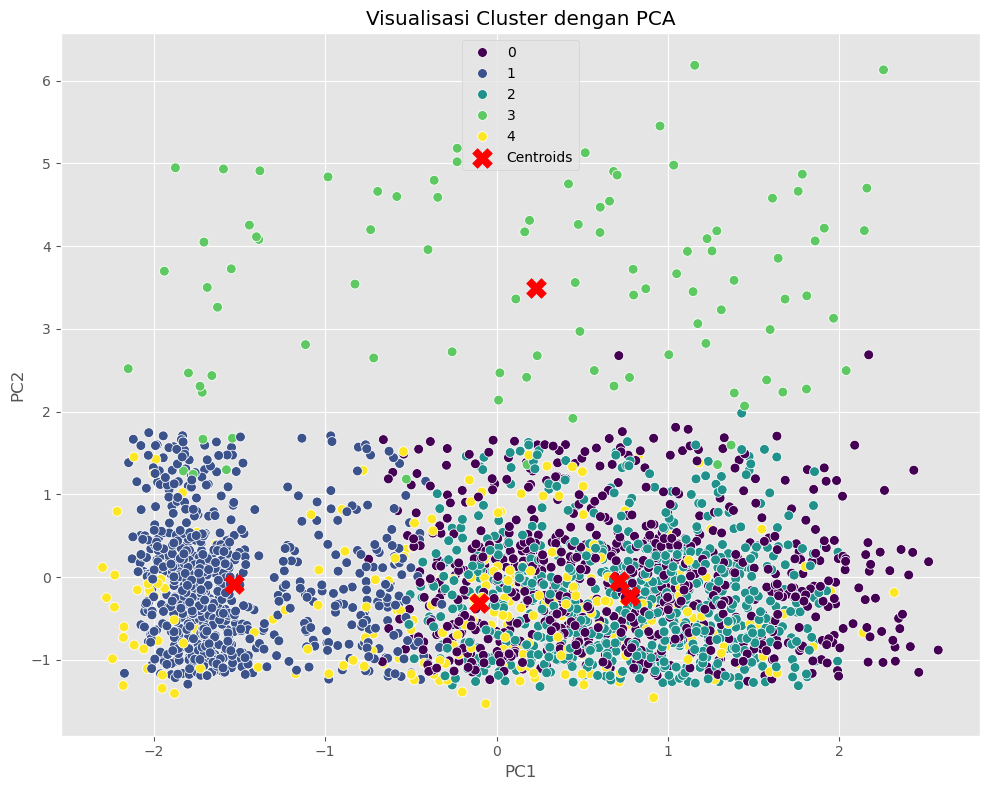

In [ ]:
# Menggunakan PCA untuk visualisasi data dalam 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_processed)

# Membuat DataFrame dengan hasil PCA
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = clusters

# Visualisasi hasil clustering dengan PCA
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca, palette='viridis', s=50)
plt.title('Visualisasi Cluster dengan PCA')
centroids_pca = pca.transform(kmeans_optimal.cluster_centers_)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='X', s=200, c='red', label='Centroids')
plt.legend()
plt.tight_layout()
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```


Analisis Karakteristik Numerik Tiap Cluster:
        TransactionAmount                           CustomerAge          \
                     mean     min      max   median        mean min max   
Cluster                                                                   
0              210.558018    0.32   752.69  165.280   45.172280  18  70   
1              243.779717    0.26   802.89  198.315   25.543909  18  49   
2              212.320337    0.84   750.95  179.000   63.358712  45  80   
3              276.324316    1.93  1531.31  180.650   44.536842  18  80   
4              943.869922  521.01  1919.11  871.575   46.128906  18  80   

               TransactionDuration                 LoginAttempts          \
        median                mean min  max median          mean min max   
Cluster                                                                    
0         45.0          121.247409  10  300  116.0      1.012953   1   2   
1         25.0          120.997167  10  299  111.

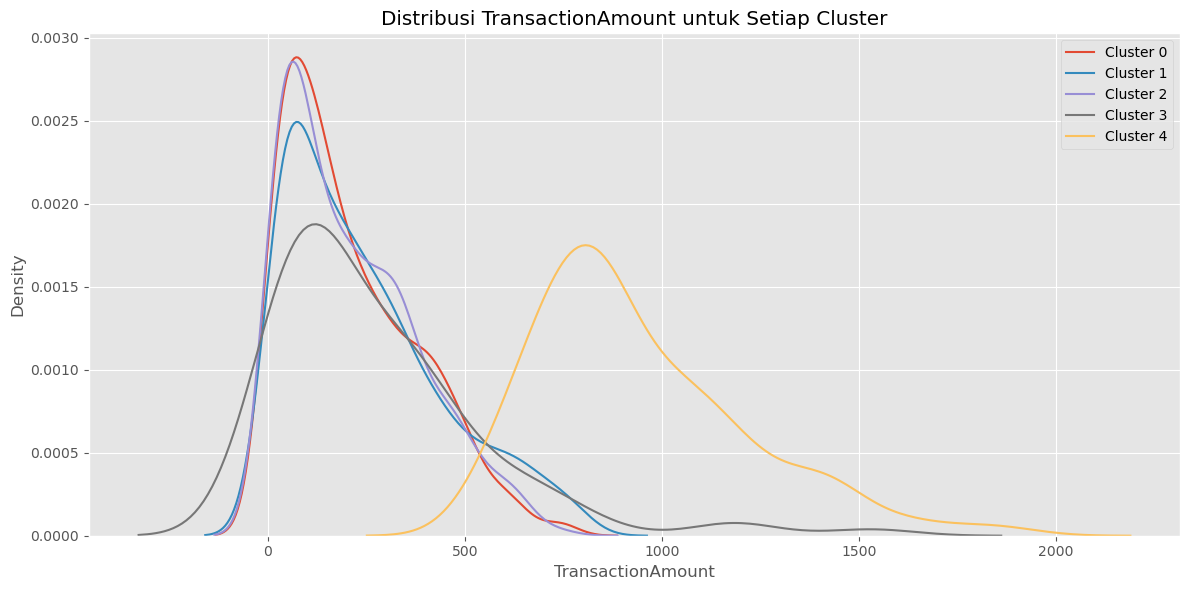

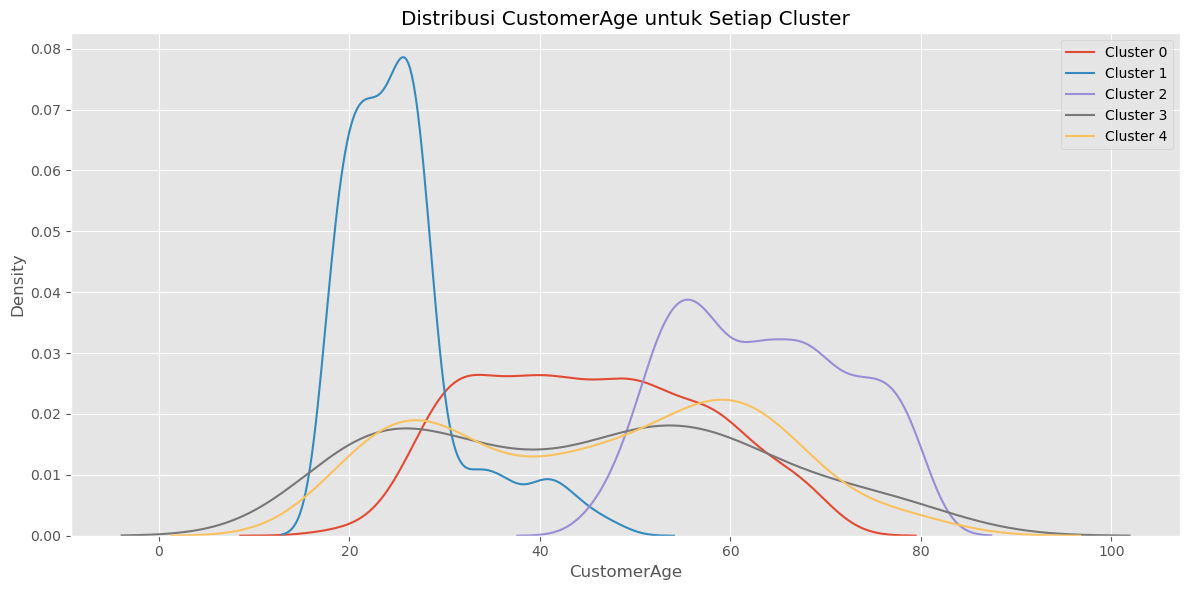

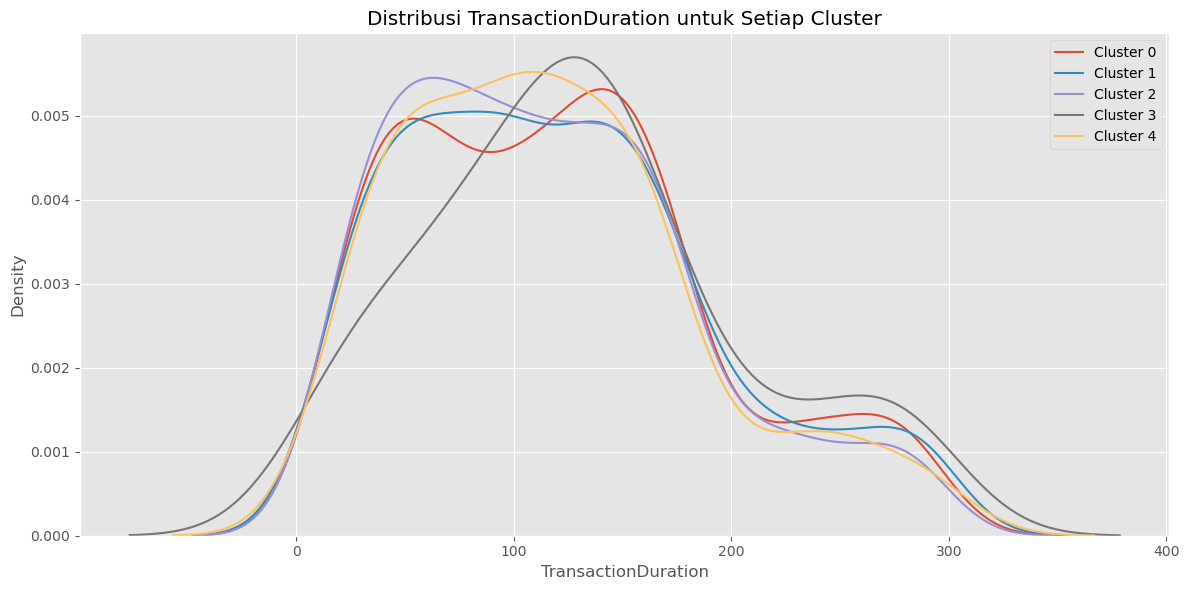

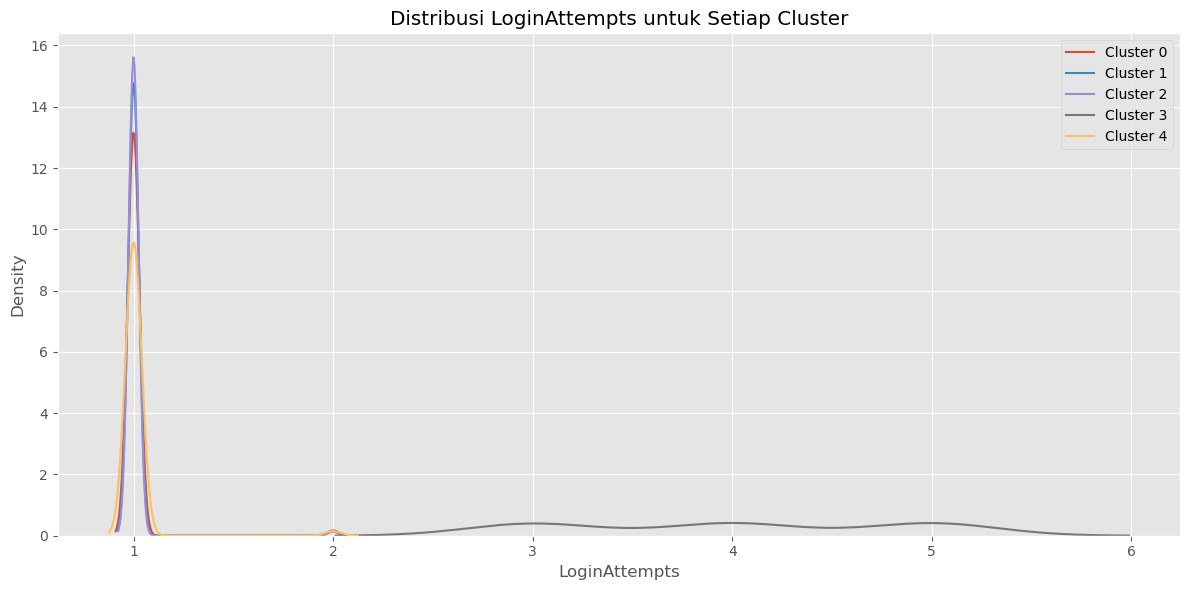

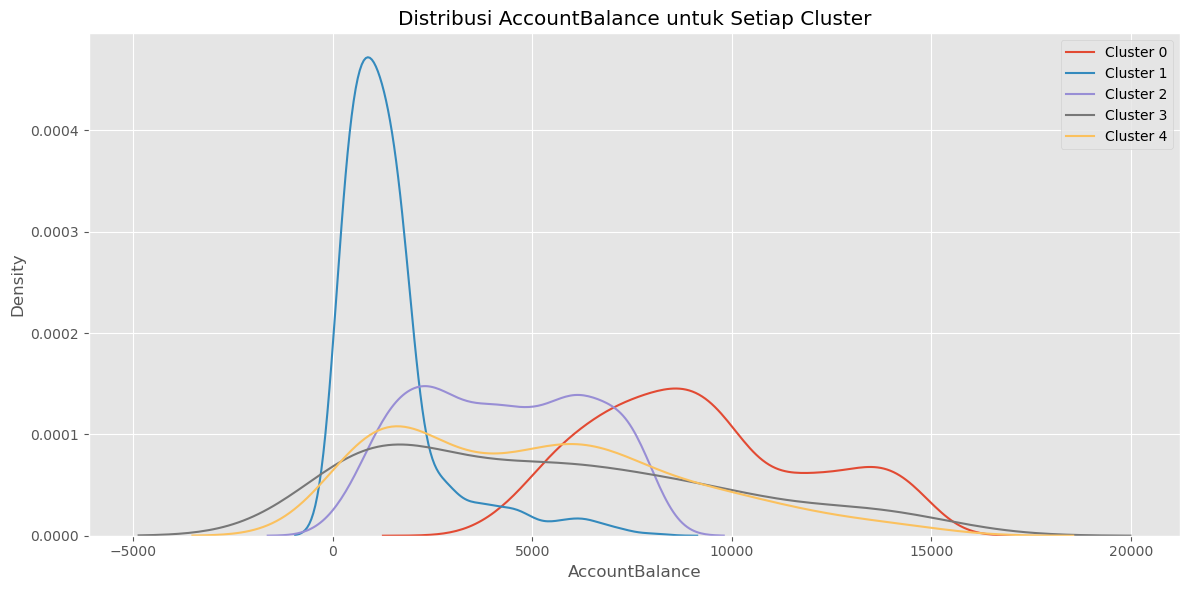

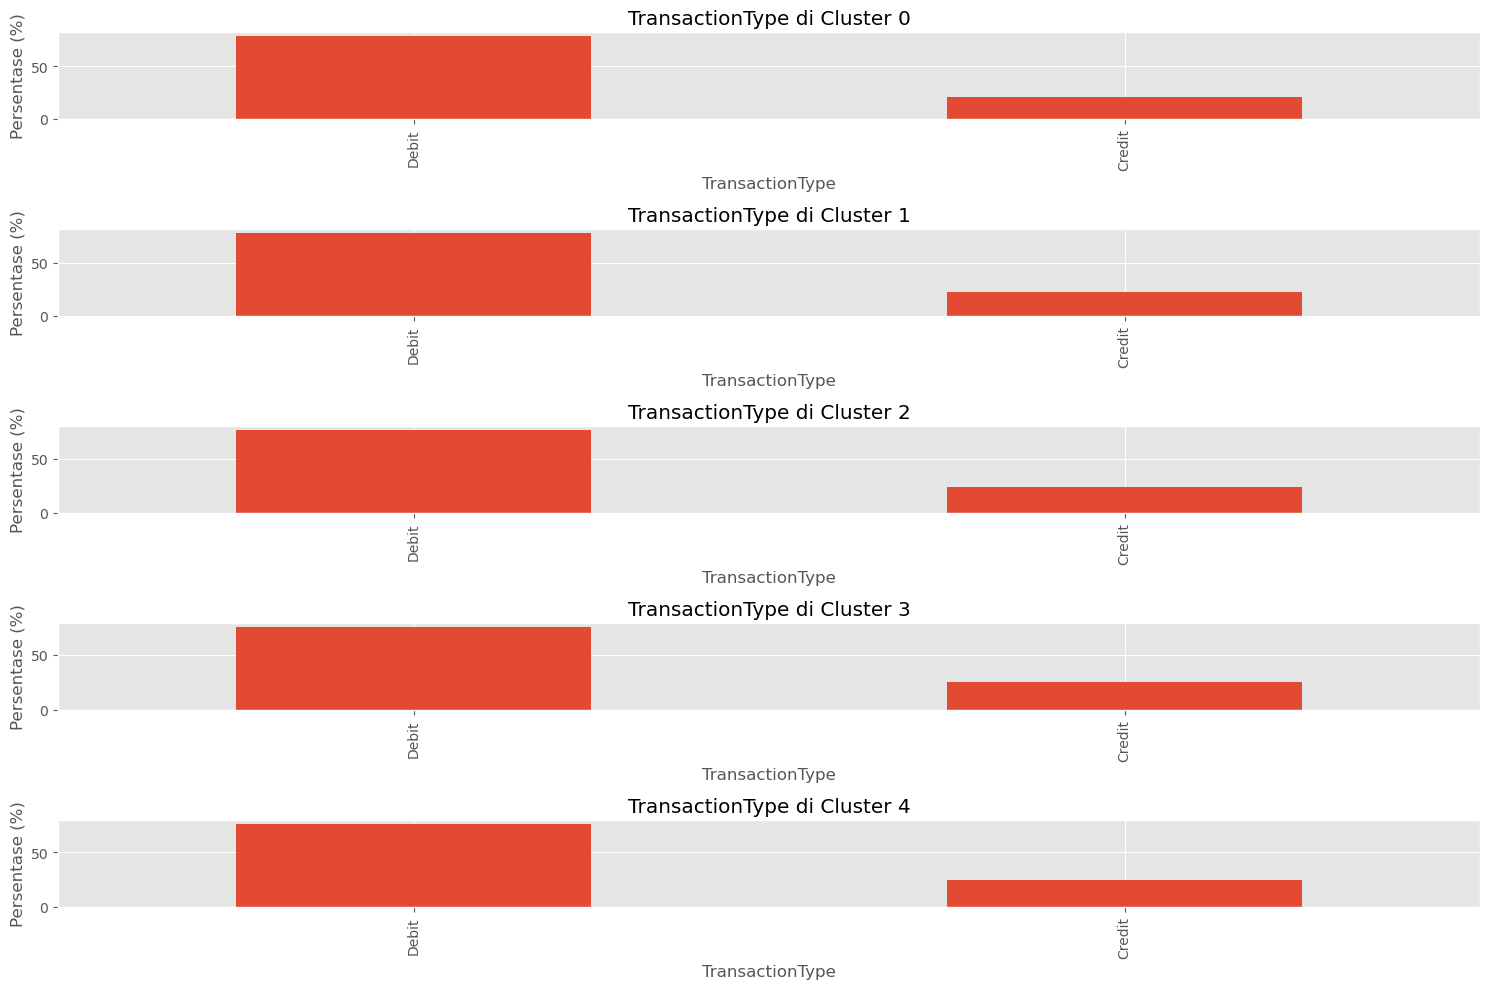

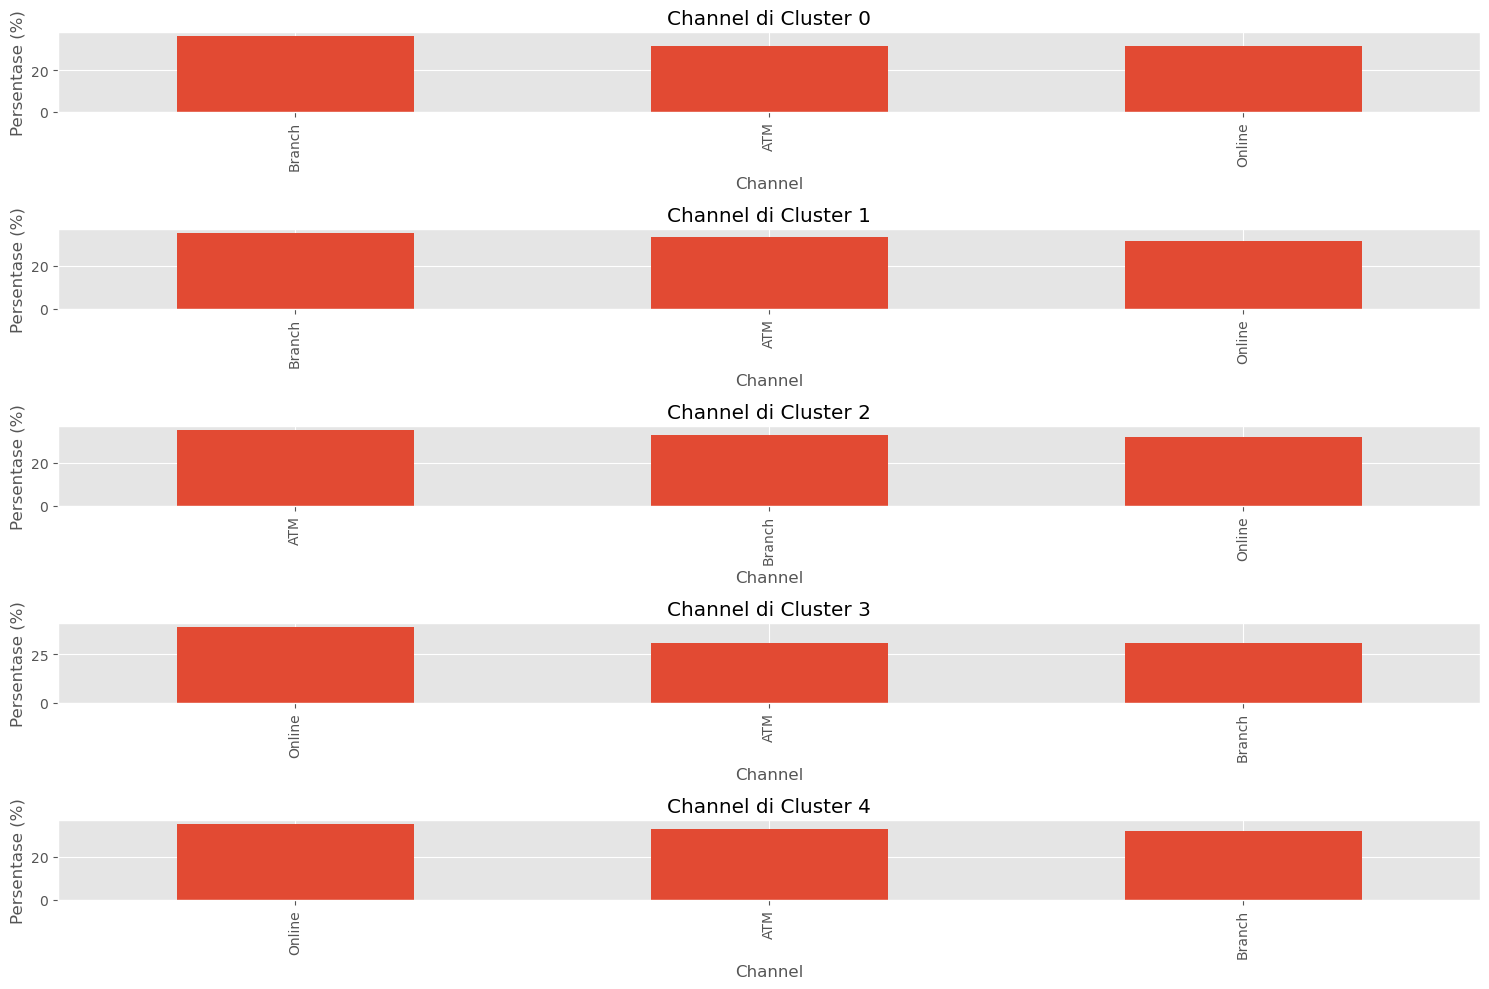

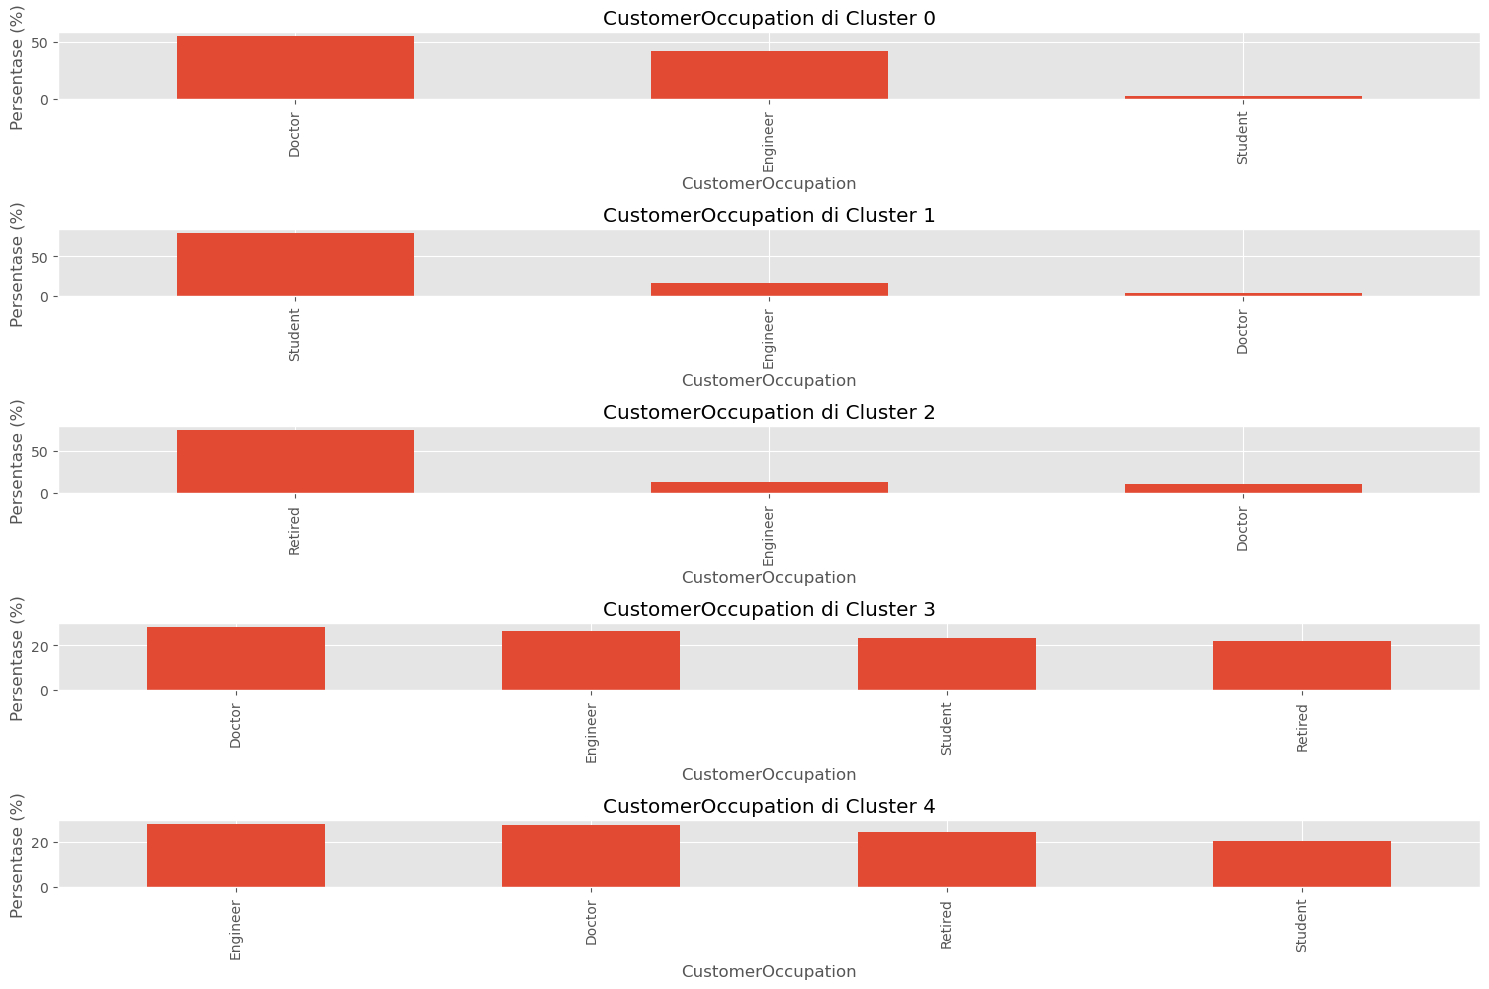

In [ ]:
# Penambahan label cluster ke dalam DataFrame asli suda dilakukan pada bagian 6a sebelumnya.

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [108]:
# Type your code here

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [ ]:
# Analisis karakteristik tiap cluster
cluster_analysis_num = df.groupby('Cluster')[numerical_features].agg(['mean', 'min', 'max', 'median'])
print("\nAnalisis Karakteristik Numerik Tiap Cluster:")
print(cluster_analysis_num)

# Analisis distribusi fitur kategorikal di tiap cluster
for cluster in range(optimal_clusters):
    print(f"\nDistribusi Kategorikal untuk Cluster {cluster}:")
    for col in categorical_features:
        print(f"\n{col} di Cluster {cluster}:")
        print(df[df['Cluster'] == cluster][col].value_counts(normalize=True) * 100)

# Visualisasi karakteristik cluster untuk fitur numerik
for col in numerical_features:
    plt.figure(figsize=(12, 6))
    for cluster in range(optimal_clusters):
        sns.kdeplot(df[df['Cluster'] == cluster][col], label=f'Cluster {cluster}')
    plt.title(f'Distribusi {col} untuk Setiap Cluster')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Visualisasi distribusi kategorikal di tiap cluster
for col in categorical_features:
    plt.figure(figsize=(15, 10))
    for i, cluster in enumerate(range(optimal_clusters)):
        plt.subplot(optimal_clusters, 1, i + 1)
        cluster_data = df[df['Cluster'] == cluster]
        (cluster_data[col].value_counts(normalize=True) * 100).plot(kind='bar')
        plt.title(f'{col} di Cluster {cluster}')
        plt.ylabel('Persentase (%)')
    plt.tight_layout()
    plt.show()

# Analisis Karakteristik Cluster dari Model K-Means

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans pada dataset transaksi bank.

## Cluster 0: Transaksi dengan Login Attempts Tinggi (3.78% dari total)
- **Rata-rata TransactionAmount:** $276.32
- **Rata-rata CustomerAge:** 44.54 tahun
- **Rata-rata TransactionDuration:** 131.88 detik
- **Rata-rata LoginAttempts:** 4.01
- **Rata-rata AccountBalance:** $5,461.64
- **Distribusi Pekerjaan:** Dokter (28.42%), Insinyur (26.32%), Mahasiswa (23.16%), Pensiunan (22.11%)
- **Saluran Transaksi:** Online (38.95%), ATM (30.53%), Branch (30.53%)
- **Analisis:** Cluster ini merupakan kelompok kecil dengan ciri khas jumlah percobaan login yang tinggi. Distribusi pekerjaan dan usia relatif seimbang, menunjukkan bahwa pola ini tidak terkait dengan demografi tertentu. Jumlah percobaan login yang tinggi bisa mengindikasikan nasabah yang kurang familiar dengan sistem perbankan digital atau potensi perilaku mencurigakan yang perlu dipantau oleh sistem keamanan bank.

## Cluster 1: Transaksi Nasabah Pensiunan (28.03% dari total)
- **Rata-rata TransactionAmount:** $210.64
- **Rata-rata CustomerAge:** 62.77 tahun
- **Rata-rata TransactionDuration:** 115.30 detik
- **Rata-rata LoginAttempts:** 1.01
- **Rata-rata AccountBalance:** $4,226.06
- **Distribusi Pekerjaan:** Pensiunan (73.58%), Insinyur (17.33%), Dokter (9.09%)
- **Saluran Transaksi:** ATM (35.37%), Branch (33.10%), Online (31.53%)
- **Analisis:** Cluster ini didominasi oleh nasabah pensiunan dengan usia tinggi. Mereka cenderung melakukan transaksi bernilai menengah dengan sedikit kecenderungan menggunakan ATM. Pola ini mencerminkan preferensi generasi yang lebih tua terhadap layanan perbankan tradisional, meskipun nilai transaksi online juga cukup signifikan. Bank dapat menyesuaikan layanan ATM dan cabang untuk mengakomodasi kebutuhan segmen nasabah ini.

## Cluster 2: Transaksi Mahasiswa dengan Saldo Rendah (28.94% dari total)
- **Rata-rata TransactionAmount:** $238.29
- **Rata-rata CustomerAge:** 25.66 tahun
- **Rata-rata TransactionDuration:** 120.24 detik
- **Rata-rata LoginAttempts:** 1.01
- **Rata-rata AccountBalance:** $1,599.32
- **Distribusi Pekerjaan:** Mahasiswa (78.27%), Insinyur (18.29%), Dokter (3.44%)
- **Saluran Transaksi:** Branch (35.63%), ATM (33.29%), Online (31.09%)
- **Analisis:** Cluster ini merepresentasikan segmen mahasiswa dengan usia muda dan saldo rekening rendah. Menariknya, meskipun mereka adalah generasi digital, preferensi mereka untuk transaksi cabang sedikit lebih tinggi. Ini mungkin menunjukkan kebutuhan konsultasi layanan perbankan karena keterbatasan pengalaman finansial. Bank dapat mengembangkan produk khusus untuk segmen ini dengan fokus pada edukasi finansial dan layanan dengan biaya rendah.

## Cluster 3: Transaksi Dokter dengan Saldo Tinggi (29.54% dari total)
- **Rata-rata TransactionAmount:** $224.84
- **Rata-rata CustomerAge:** 45.97 tahun
- **Rata-rata TransactionDuration:** 122.13 detik
- **Rata-rata LoginAttempts:** 1.01
- **Rata-rata AccountBalance:** $9,469.98
- **Distribusi Pekerjaan:** Dokter (61.73%), Insinyur (36.79%), Mahasiswa (1.48%)
- **Saluran Transaksi:** Branch (36.79%), Online (31.67%), ATM (31.54%)
- **Analisis:** Cluster ini mewakili segmen profesional mapan, terutama dokter dan insinyur, dengan saldo rekening sangat tinggi. Meskipun memiliki kekayaan tinggi, nilai transaksi mereka relatif moderat, menunjukkan pola pengelolaan keuangan yang konservatif. Preferensi mereka untuk layanan cabang mungkin mencerminkan kebutuhan akan layanan perbankan yang lebih personal atau kompleks. Bank dapat mengoptimalkan layanan wealth management dan investasi untuk segmen nasabah premium ini.

## Cluster 4: Transaksi Bernilai Tinggi (9.71% dari total)
- **Rata-rata TransactionAmount:** $954.69
- **Rata-rata CustomerAge:** 45.22 tahun
- **Rata-rata TransactionDuration:** 118.08 detik
- **Rata-rata LoginAttempts:** 1.02
- **Rata-rata AccountBalance:** $4,769.25
- **Distribusi Pekerjaan:** Insinyur (29.51%), Dokter (23.36%), Pensiunan (24.59%), Mahasiswa (22.54%)
- **Saluran Transaksi:** Online (37.30%), ATM (32.38%), Branch (30.33%)
- **Analisis:** Cluster ini menonjol dengan nilai transaksi yang sangat tinggi (lebih dari 4x cluster lain) namun tanpa kecenderungan demografis yang jelas. Distribusi pekerjaan dan saluran transaksi relatif merata, menunjukkan bahwa transaksi bernilai tinggi dilakukan oleh berbagai segmen nasabah. Preferensi yang sedikit lebih tinggi untuk transaksi online menunjukkan kenyamanan dalam melakukan transaksi besar secara digital. Bank dapat mempertimbangkan peningkatan limit transaksi online dan fitur keamanan tambahan untuk mengakomodasi perilaku ini.

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [110]:
# Menyimpan hasil clustering ke dalam file CSV
# df.to_csv('bank_transactions_clustered.csv', index=False)
print("\nHasil clustering telah disimpan dalam file 'bank_transactions_clustered.csv'")

# Interpretasi Cluster
print("\nInterpretasi Cluster:")
print("""
Cluster 0: Transaksi dengan Login Attempts Tinggi (3.78% dari total)
- Kelompok kecil dengan ciri khas login attempts tinggi (rata-rata 4.01)
- Transaksi bernilai menengah (rata-rata $276.32)
- Usia nasabah bervariasi dengan distribusi seimbang (rata-rata 44.54 tahun)
- Saldo rekening menengah (rata-rata $5,461.64)
- Distribusi pekerjaan relatif seimbang dengan sedikit kecenderungan ke Dokter (28.42%)
- Preferensi saluran transaksi lebih ke Online (38.95%)
- Potensi perilaku risiko keamanan karena banyak percobaan login

Cluster 1: Transaksi Nasabah Pensiunan (28.03% dari total)
- Didominasi nasabah pensiunan (73.58%) dengan usia tinggi (rata-rata 62.77 tahun)
- Nilai transaksi menengah (rata-rata $210.64)
- Saldo rekening menengah (rata-rata $4,226.06)
- Preferensi saluran transaksi sedikit ke ATM (35.37%)
- Menunjukkan pola transaksi konservatif dengan nilai transaksi moderat

Cluster 2: Transaksi Mahasiswa dengan Saldo Rendah (28.94% dari total)
- Didominasi oleh pelajar/mahasiswa (78.27%) dengan usia muda (rata-rata 25.66 tahun)
- Saldo rekening sangat rendah (rata-rata $1,599.32)
- Nilai transaksi menengah (rata-rata $238.29)
- Preferensi saluran transaksi sedikit ke Branch (35.63%)
- Menggambarkan segmen nasabah muda dengan daya beli terbatas

Cluster 3: Transaksi Dokter dengan Saldo Tinggi (29.54% dari total)
- Didominasi dokter (61.73%) dan insinyur (36.79%)
- Saldo rekening sangat tinggi (rata-rata $9,469.98)
- Usia menengah (rata-rata 45.97 tahun)
- Nilai transaksi menengah (rata-rata $224.84)
- Preferensi saluran transaksi sedikit ke Branch (36.79%)
- Menggambarkan segmen profesional mapan dengan kekayaan tinggi

Cluster 4: Transaksi Bernilai Tinggi (9.71% dari total)
- Nilai transaksi sangat tinggi (rata-rata $954.69, lebih dari 4x cluster lain)
- Distribusi pekerjaan cukup merata dengan sedikit kecenderungan ke Insinyur (29.51%)
- Usia menengah (rata-rata 45.22 tahun)
- Saldo rekening menengah (rata-rata $4,769.25)
- Preferensi saluran transaksi sedikit ke Online (37.30%)
- Menunjukkan pola transaksi bernilai tinggi tanpa kecenderungan demografis tertentu
""")


Hasil clustering telah disimpan dalam file 'bank_transactions_clustered.csv'

Interpretasi Cluster:

Cluster 0: Transaksi dengan Login Attempts Tinggi (3.78% dari total)
- Kelompok kecil dengan ciri khas login attempts tinggi (rata-rata 4.01)
- Transaksi bernilai menengah (rata-rata $276.32)
- Usia nasabah bervariasi dengan distribusi seimbang (rata-rata 44.54 tahun)
- Saldo rekening menengah (rata-rata $5,461.64)
- Distribusi pekerjaan relatif seimbang dengan sedikit kecenderungan ke Dokter (28.42%)
- Preferensi saluran transaksi lebih ke Online (38.95%)
- Potensi perilaku risiko keamanan karena banyak percobaan login

Cluster 1: Transaksi Nasabah Pensiunan (28.03% dari total)
- Didominasi nasabah pensiunan (73.58%) dengan usia tinggi (rata-rata 62.77 tahun)
- Nilai transaksi menengah (rata-rata $210.64)
- Saldo rekening menengah (rata-rata $4,226.06)
- Preferensi saluran transaksi sedikit ke ATM (35.37%)
- Menunjukkan pola transaksi konservatif dengan nilai transaksi moderat

Cluste